In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/cornwall2.csv')

In [3]:
box=pd.read_csv('https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/rooftop_server.csv')

In [4]:
box.columns = ['Date',"id","unix","hwpm2.5",'hwpm10','pm1.0std','pm2.5std','pm10std','pm1.0env','pm2.5env','pm10env',"0.3um","0.5um","1.0um","2.5um","5.0um","10um","shinyei","samyoung","exwind","inwind","temp","RH"]
box.head()

,Date,id,unix,hwpm2.5,hwpm10,pm1.0std,pm2.5std,pm10std,pm1.0env,pm2.5env,...,1.0um,2.5um,5.0um,10um,shinyei,samyoung,exwind,inwind,temp,RH
0,2019-06-27 07:32:43,2,1561617124,3,4,5,6,6,5,6,...,25,0,0,0,0.00,0.00,0.24,2.63,21.34,65.70
1,2019-06-27 07:32:52,3,1561617133,3,4,4,5,5,4,5,...,27,0,0,0,0.95,0.00,0.02,4.76,21.38,65.41
2,2019-06-27 07:33:00,4,1561617141,3,4,4,5,6,4,5,...,22,1,1,0,6.59,0.00,0.02,1.14,21.44,65.15
3,2019-06-27 07:33:08,5,1561617149,3,4,5,6,7,5,6,...,28,3,1,0,0.00,0.04,0.24,0.72,21.48,64.94
4,2019-06-27 07:33:17,6,1561617158,3,4,4,5,6,4,5,...,20,3,1,0,0.00,0.00,0.02,4.92,21.51,64.77


In [5]:
df=df.dropna()

In [6]:
df['Datetime']=pd.to_datetime(dict(year=df.year, month=df.month, day=df.date))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9442 entries, 0 to 9441
Data columns (total 8 columns):
year        9442 non-null int64
month       9442 non-null int64
date        9442 non-null int64
hour        9442 non-null int64
o3          9442 non-null object
pm2.5       9442 non-null object
No2         9442 non-null object
Datetime    9442 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 663.9+ KB


In [8]:
#cols = pdr.columns[pdr.dtypes.eq('object')]
df['pm2.5'] = df['pm2.5'].apply(pd.to_numeric,errors = 'coerce')

C:\Users\nuera\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


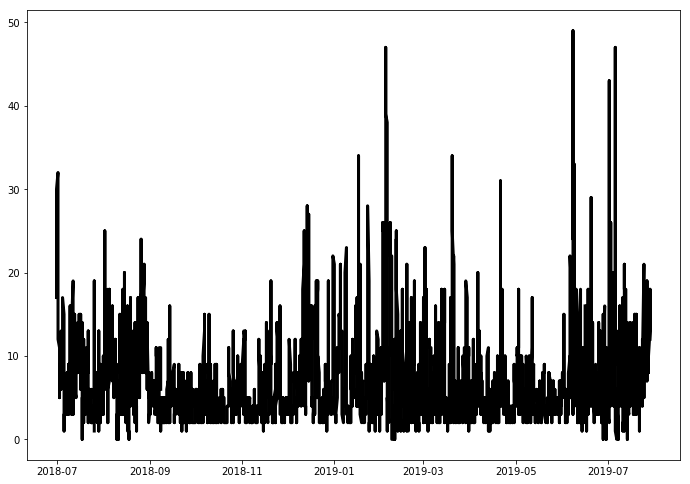

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots()

fig.set_size_inches(11.7, 8.27)


ax1.plot(df['Datetime'],df['pm2.5'], 'k-', lw=3,label='CCNY')



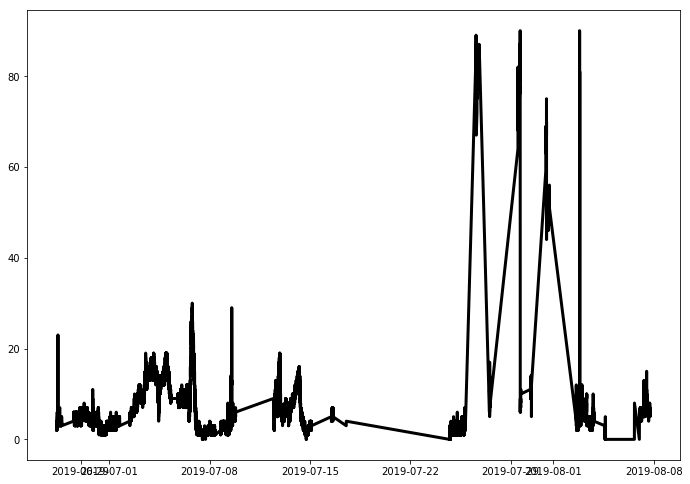

In [10]:
box['Date']=pd.to_datetime(box['Date'])

fig, ax1 = plt.subplots()

fig.set_size_inches(11.7, 8.27)


ax1.plot(box['Date'],box['hwpm2.5'], 'k-', lw=3,label='CCNY')


In [11]:
box.index=box['Date']
boxn=box.resample('1h').mean()


In [12]:
boxn=boxn.reset_index()


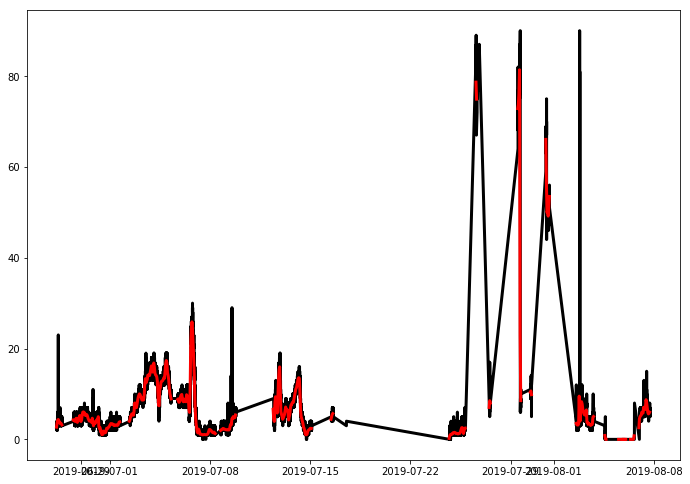

In [13]:
fig, ax1 = plt.subplots()

fig.set_size_inches(11.7, 8.27)


ax1.plot(box['Date'],box['hwpm2.5'], 'k-', lw=3,label='CCNY')
ax1.plot(boxn['Date'],boxn['hwpm2.5'], 'r-', lw=3,label='CCNY')

In [14]:
boxn['Datetime']=boxn['Date']

In [15]:
df = pd.merge_asof(boxn,df[['Datetime','pm2.5']], on='Datetime', tolerance=pd.Timedelta("3 hours"), direction='nearest').fillna('NaN')

In [16]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric,errors = 'coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 994
Data columns (total 25 columns):
Date        995 non-null datetime64[ns]
id          439 non-null float64
unix        439 non-null float64
hwpm2.5     439 non-null float64
hwpm10      439 non-null float64
pm1.0std    439 non-null float64
pm2.5std    439 non-null float64
pm10std     439 non-null float64
pm1.0env    439 non-null float64
pm2.5env    439 non-null float64
pm10env     439 non-null float64
0.3um       439 non-null float64
0.5um       439 non-null float64
1.0um       439 non-null float64
2.5um       439 non-null float64
5.0um       439 non-null float64
10um        439 non-null float64
shinyei     439 non-null float64
samyoung    439 non-null float64
exwind      439 non-null float64
inwind      439 non-null float64
temp        439 non-null float64
RH          439 non-null float64
Datetime    995 non-null datetime64[ns]
pm2.5       224 non-null float64
dtypes: datetime64[ns](2), float64(23)
memory usage: 202

In [18]:
df=df.dropna()


In [19]:

from matplotlib.ticker import FuncFormatter

def equidate_ax(fig, ax, dates, fmt="%m-%d %H:%M", label="Date"):  
    N = len(dates)
    def format_date(index, pos):
        index = np.clip(int(index + 0.5), 0, N - 1)
        return dates[index].strftime(fmt)
    ax.xaxis.set_major_formatter(FuncFormatter(format_date))
    ax.set_xlabel(label)
    fig.autofmt_xdate()
    
dates=df['Datetime']
x = np.arange(len(dates))



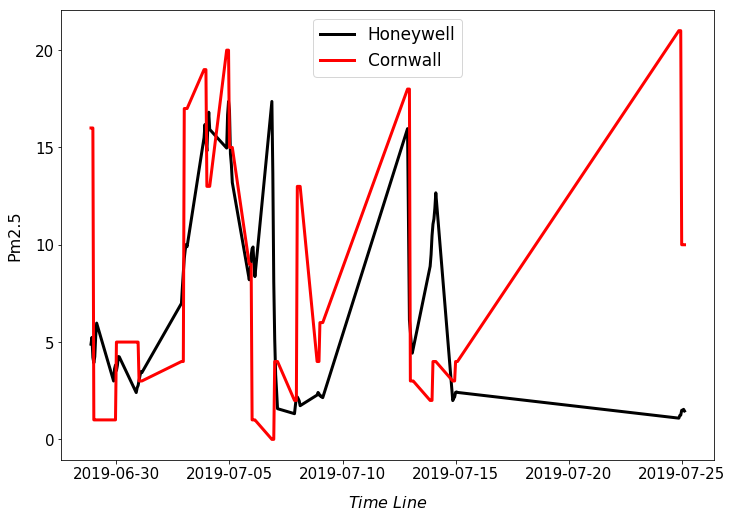

In [44]:
fig, ax1 = plt.subplots()

fig.set_size_inches(11.7, 8.27)


lns1=ax1.plot(df['Datetime'],df['hwpm2.5'], 'k-', lw=3,label='Honeywell')
lns2=ax1.plot(df['Datetime'],df['pm2.5'], 'r-', lw=3,label='Cornwall')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Pm2.5',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))


#equidate_ax(fig, ax1, dates)

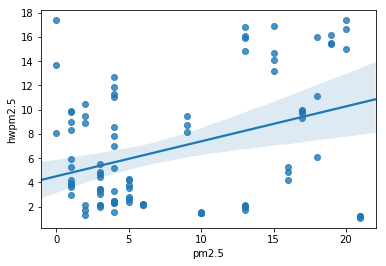

In [21]:
import seaborn as sns
ax = sns.regplot(x="pm2.5", y="hwpm2.5", data=df)

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from scipy.stats import spearmanr, pearsonr
from sklearn.svm import SVR
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

In [24]:
df=df.dropna()
df.head()

,Date,id,unix,hwpm2.5,hwpm10,pm1.0std,pm2.5std,pm10std,pm1.0env,pm2.5env,...,5.0um,10um,shinyei,samyoung,exwind,inwind,temp,RH,Datetime,pm2.5
38,2019-06-28 21:00:00,7510.0,1.561754e+09,4.891765,5.891765,10.931765,13.825882,14.221176,10.931765,13.825882,...,0.428235,0.129412,1.667435,0.296565,0.780635,0.355082,23.961812,65.054682,2019-06-28 21:00:00,16.0
39,2019-06-28 22:00:00,7934.0,1.561757e+09,5.241135,6.241135,12.508274,15.822695,16.333333,12.508274,15.822695,...,0.557920,0.141844,1.584019,0.202908,0.784775,0.670993,23.366005,68.244161,2019-06-28 22:00:00,16.0
40,2019-06-28 23:00:00,8352.5,1.561761e+09,4.207729,5.207729,9.630435,12.091787,12.526570,9.630435,12.091787,...,0.456522,0.123188,1.550048,0.222077,1.101159,1.192585,22.329106,71.518986,2019-06-28 23:00:00,16.0
41,2019-06-29 00:00:00,8769.0,1.561765e+09,3.928401,4.928401,8.897375,11.369928,11.868735,8.897375,11.369928,...,0.539379,0.147971,1.667375,0.189093,0.416850,1.986468,21.368496,76.115728,2019-06-29 00:00:00,1.0
42,2019-06-29 01:00:00,9185.5,1.561768e+09,4.246377,5.246377,9.649758,12.463768,12.927536,9.649758,12.463768,...,0.502415,0.125604,1.471691,0.205676,0.767778,2.047367,21.191425,75.775411,2019-06-29 01:00:00,1.0


In [40]:
ya=df['pm2.5']
#xa=df[["hwpm2.5",'hwpm10','pm1.0std','pm2.5std','pm10std','pm1.0env','pm2.5env','pm10env',"0.3um","0.5um","1.0um","2.5um","5.0um","10um","shinyei","samyoung","exwind","inwind","temp","RH"]]
xa=df[["hwpm2.5","exwind","temp","RH"]]

features = xa
targets = ya


X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

rf = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=0)
rf.fit(X_train, y_train)


p= rf.predict(xa)

C:\Users\nuera\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
importances = rf.feature_importances_
importances

array([0.33850142, 0.34726385, 0.1669421 , 0.14729262])

<BarContainer object of 4 artists>

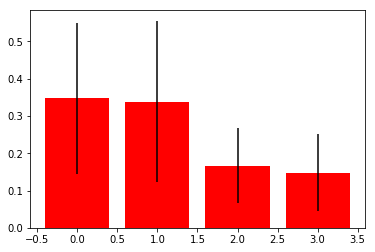

In [27]:
import numpy as np
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
plt.bar(range(xa.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

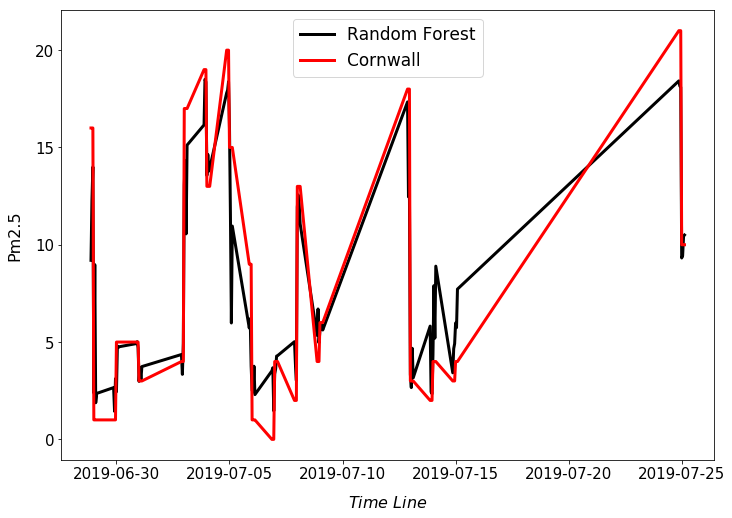

In [43]:
df['p']=p

fig, ax1 = plt.subplots()

fig.set_size_inches(11.7, 8.27)




lns1=ax1.plot(df['Datetime'],df['p'], 'k-', lw=3,label='Random Forest')
lns2=ax1.plot(df['Datetime'],df['pm2.5'], 'r-', lw=3,label='Cornwall')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Pm2.5',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

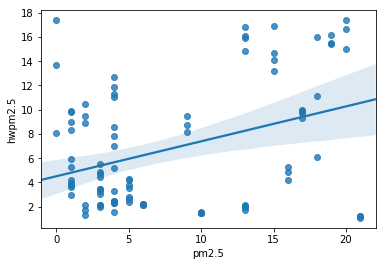

In [29]:
import seaborn as sns
ax = sns.regplot(x="pm2.5", y="hwpm2.5", data=df)

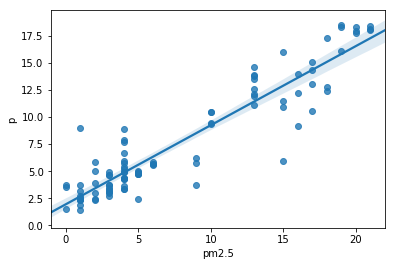

In [30]:
import seaborn as sns
ax = sns.regplot(x="pm2.5", y="p", data=df)

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df['cornwall']=df['pm2.5']
df['hw']=df['hwpm2.5']


results = smf.ols('cornwall ~ hw', data=df).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               cornwall   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     15.03
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           0.000195
Time:                        23:27:33   Log-Likelihood:                -312.15
No. Observations:                  97   AIC:                             628.3
Df Residuals:                      95   BIC:                             633.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6581      1.036      4.496      0.0

In [46]:
results = smf.ols('cornwall ~ p', data=df).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               cornwall   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     613.0
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           3.23e-43
Time:                        23:27:50   Log-Likelihood:                -221.86
No. Observations:                  97   AIC:                             447.7
Df Residuals:                      95   BIC:                             452.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2401      0.442     -2.806      0.0